In [10]:
import statistics as st
from scipy.stats import t
import json
from statistics import mode, mean
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from saltos import get_saltos

In [11]:
def outliers(data):
  res = []
  while len(data) > 0:
    prom = st.mean(data)
    S = st.stdev(data)
    alpha = 0.05
    n = len(data)
    t_alfa2 = t.ppf(1-alpha/2, n-2)
    tau = (t_alfa2 * (n-1))/(np.sqrt(n) * np.sqrt(n - 2 + t_alfa2**2))
    deltas = [np.abs(x - prom) for x in data]
    outlier_candidate = [x for x in data if np.abs(x - prom) == max(deltas)][0]
    if max(deltas) > tau * S:
      res.append(outlier_candidate)
      data.remove(outlier_candidate)
    else:
      break
  return res

['195.22.220.56\nto\n195.22.199.82', '4.68.62.57\nto\n4.69.159.5']




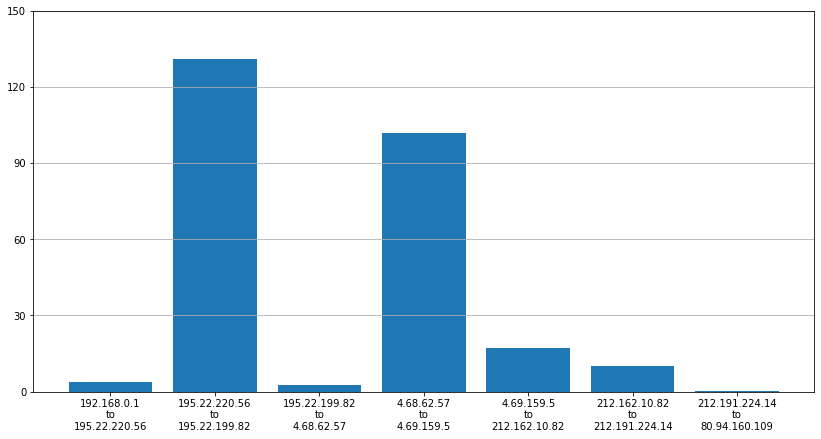

['195.22.220.56\nto\n89.221.41.171', '154.54.7.157\nto\n154.54.30.186', '154.54.30.186\nto\n149.14.80.210', '196.32.210.57\nto\n197.136.176.58']




<Figure size 432x288 with 0 Axes>

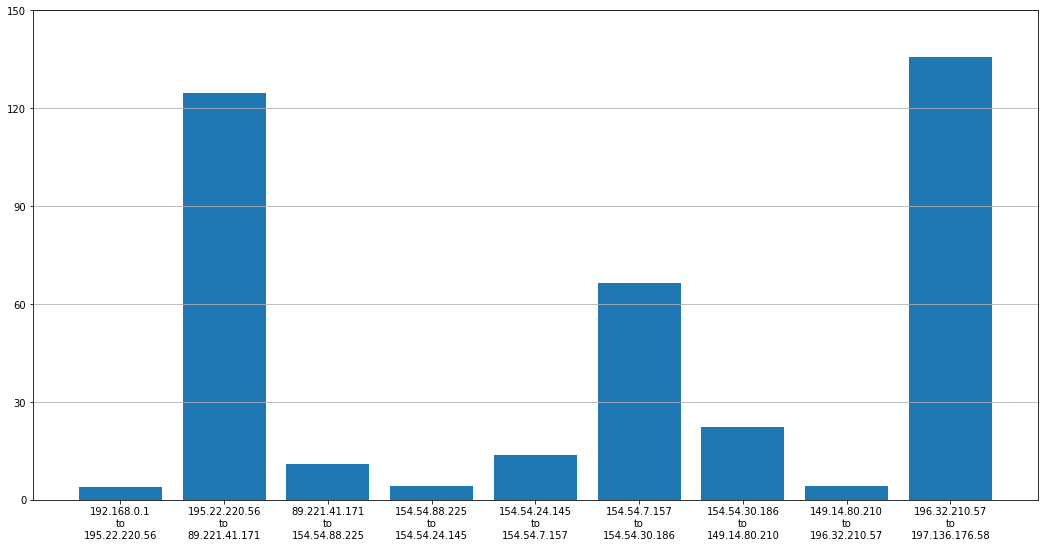

['154.54.82.241\nto\n27.68.250.13']




<Figure size 432x288 with 0 Axes>

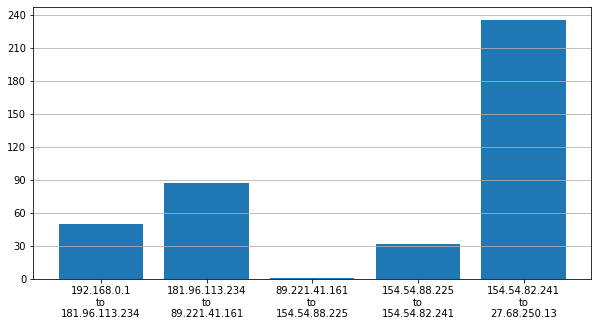

<Figure size 432x288 with 0 Axes>

In [12]:
for name, ip, uni in [('bsu_by_responses', "217.21.43.35", 'Bielorrusia'), ('uonbi_ac_ke_responses', "41.204.161.206", 'Nairobi'), ('vnu_edu_vn_responses', "112.137.142.4", 'Vietnam')]:
  saltos = get_saltos(name, ip)

  rtts = [rtt for rtt, ip in saltos]
  ips = [ip for rtt, ip in saltos]
  rtt_outliers = outliers(rtts.copy())

  print([ip for rtt, ip in saltos if rtt in rtt_outliers])
  print()
  print()
  plt.figure(figsize=(len(saltos)*2, len(saltos)))
  plt.bar(range(len(rtts)), rtts)
  plt.xticks(range(len(rtts)), labels=ips)
  plt.yticks(range(0, int(max(rtts)) + 30, 30))
  plt.grid(axis="y")
  plt.savefig(name + "img.png")
  plt.show()
  plt.clf()